# The Dataset 

The dataset contains information on bookings for resort and a city hotel, two hotels situated in Portugal. The data has 119390 data points of hotel reservations and cancellations for the two hotels between July 1, 2015 and August 31, 2017.

#### Questions Answered in this analysis and vizualization includes:

- 1 Combined <b>Count</b> and <b>Percentage</b> of Reservations <b>Canceled</b> vs <b>not Canceled</b> for both hotels
- 2 <b>Count</b> and <b>Percentage</b> of Reservations <b>Canceled</b> vs <b>not Canceled</b> for the hotels separately.
     - Analyzing Effect of adr (average daily rate) on bookings and cancelations
     - Average Daily Rate for Resort Hotel and City Hotel effects on reservations.
     - Average daily rate per month and its effect on booking rate effects on reservations.

- 3 Top 5 countries with the highest booking and cancelation.
- 4 Deposit Type for all reservations.
- 5 Deposit Type for all reservations based on customer type.
- 6 Most Frequent Deposit Type For Canceled and Confirmed Reservations
- 7 Reservations by Repeated Visitors 
- 8 Most preffered hotel by meal plan 
- 9 Most preffered hotel by Visitors
- 10 Booking based on Market segment and Distribution Channel for CONFIRMED reservation 
- 11 Leading Market segment and Distribution Channel for CONFIRMED reservation

# Importing Iibraries and Supressing Warnings 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

# Reading the dataset 

In [2]:
dataset = pd.read_csv('hotel_booking.csv')

In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Inspecting the dataset

In [4]:
dataset.shape

(119390, 36)

The dataset has about 119,390 data points and 36 rows

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- As can be observed, the dataset has 35 variables with one dependent/target variable, which is <b>'is_cancelled</b> the outcome we are interested in measuring. 

- <b>reservation_status_date</b> should be a date data type and not and object data type

## Data Cleaning 

#### Checking for Missing Values 

In [6]:
dataset.isna().any().any()

True

In [7]:
dataset.isna().any().sum()

4

In [8]:
# Checking for Number of missing values in each column

dataset.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

- Missing values can be observed in <b>company, agent, country</b> and <b>children</b> columns

In [9]:
# Investigating percentage of missing data per column
round(dataset.isnull().sum().sort_values(ascending = False)/len(dataset)*100, 2)

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
hotel                              0.00
booking_changes                    0.00
deposit_type                       0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
reserved_room_type                 0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
reservation_status_date            0.00
name                               0.00
email                              0.00
phone-number                       0.00
assigned_room_type                 0.00
previous_bookings_not_canceled     0.00
is_canceled                        0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
distribution_channel               0.00
market_segment                     0.00


<b>company and agent </b>columns has high percentage of missing values <b>94.31%</b> and <b>13.69%</b>

- In this instance (cell below), we will replace the null values with 0.


In [10]:
#Repalcing Null in company and agent columns with 0 
dataset[['company','agent']] = dataset[['company','agent']].fillna(0)

In [11]:
#Replacing NULL values in country column with most frecuent value or mode 
dataset['country'] = dataset['country'].fillna(dataset['country'].mode()[0])

In [12]:
#Rechecking null values 
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

- No missing values in the dataset 

### Dropping Columns 

- This columns are dropped because they are irrelevant to the exploratory data analysis been conducted.

In [13]:
# Dropping name, email, phone number credit card details
dataset.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1,inplace=True)

In [14]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
dataset.shape

(119390, 32)

## Separating Numerical  & Categorical Columns 

In [16]:
dataset_numerical_features = dataset.select_dtypes(include=[np.number])
dataset_categorical_features = dataset.select_dtypes(exclude=[np.number])

In [17]:
dataset_numerical_features.shape[1]

20

In [18]:
dataset_numerical_features = dataset.select_dtypes(include='number')
dataset_numerical_features

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


In [19]:
dataset_categorical_features.shape


(119390, 12)

In [20]:
dataset_categorical_features = dataset.select_dtypes(exclude='number')
dataset_categorical_features

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


### Checking All Unique Values in All Categorical Columns

In [21]:
#Checking All Unique values in Each Categorical Column for Inconsistent Data

print(f"Unique values For All Categorical Columns\n".upper())

for categorical_features in dataset_categorical_features:
    unique_values = dataset[categorical_features].unique()
    print(f"\n{categorical_features}: \n{unique_values}\n")
    print('-' * 40)

UNIQUE VALUES FOR ALL CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

----------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'S

In [22]:
#Replacing 'Undefined' meal type with 'SC'

dataset['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

In [23]:
dataset['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

### Investigating Outliers With boxplot

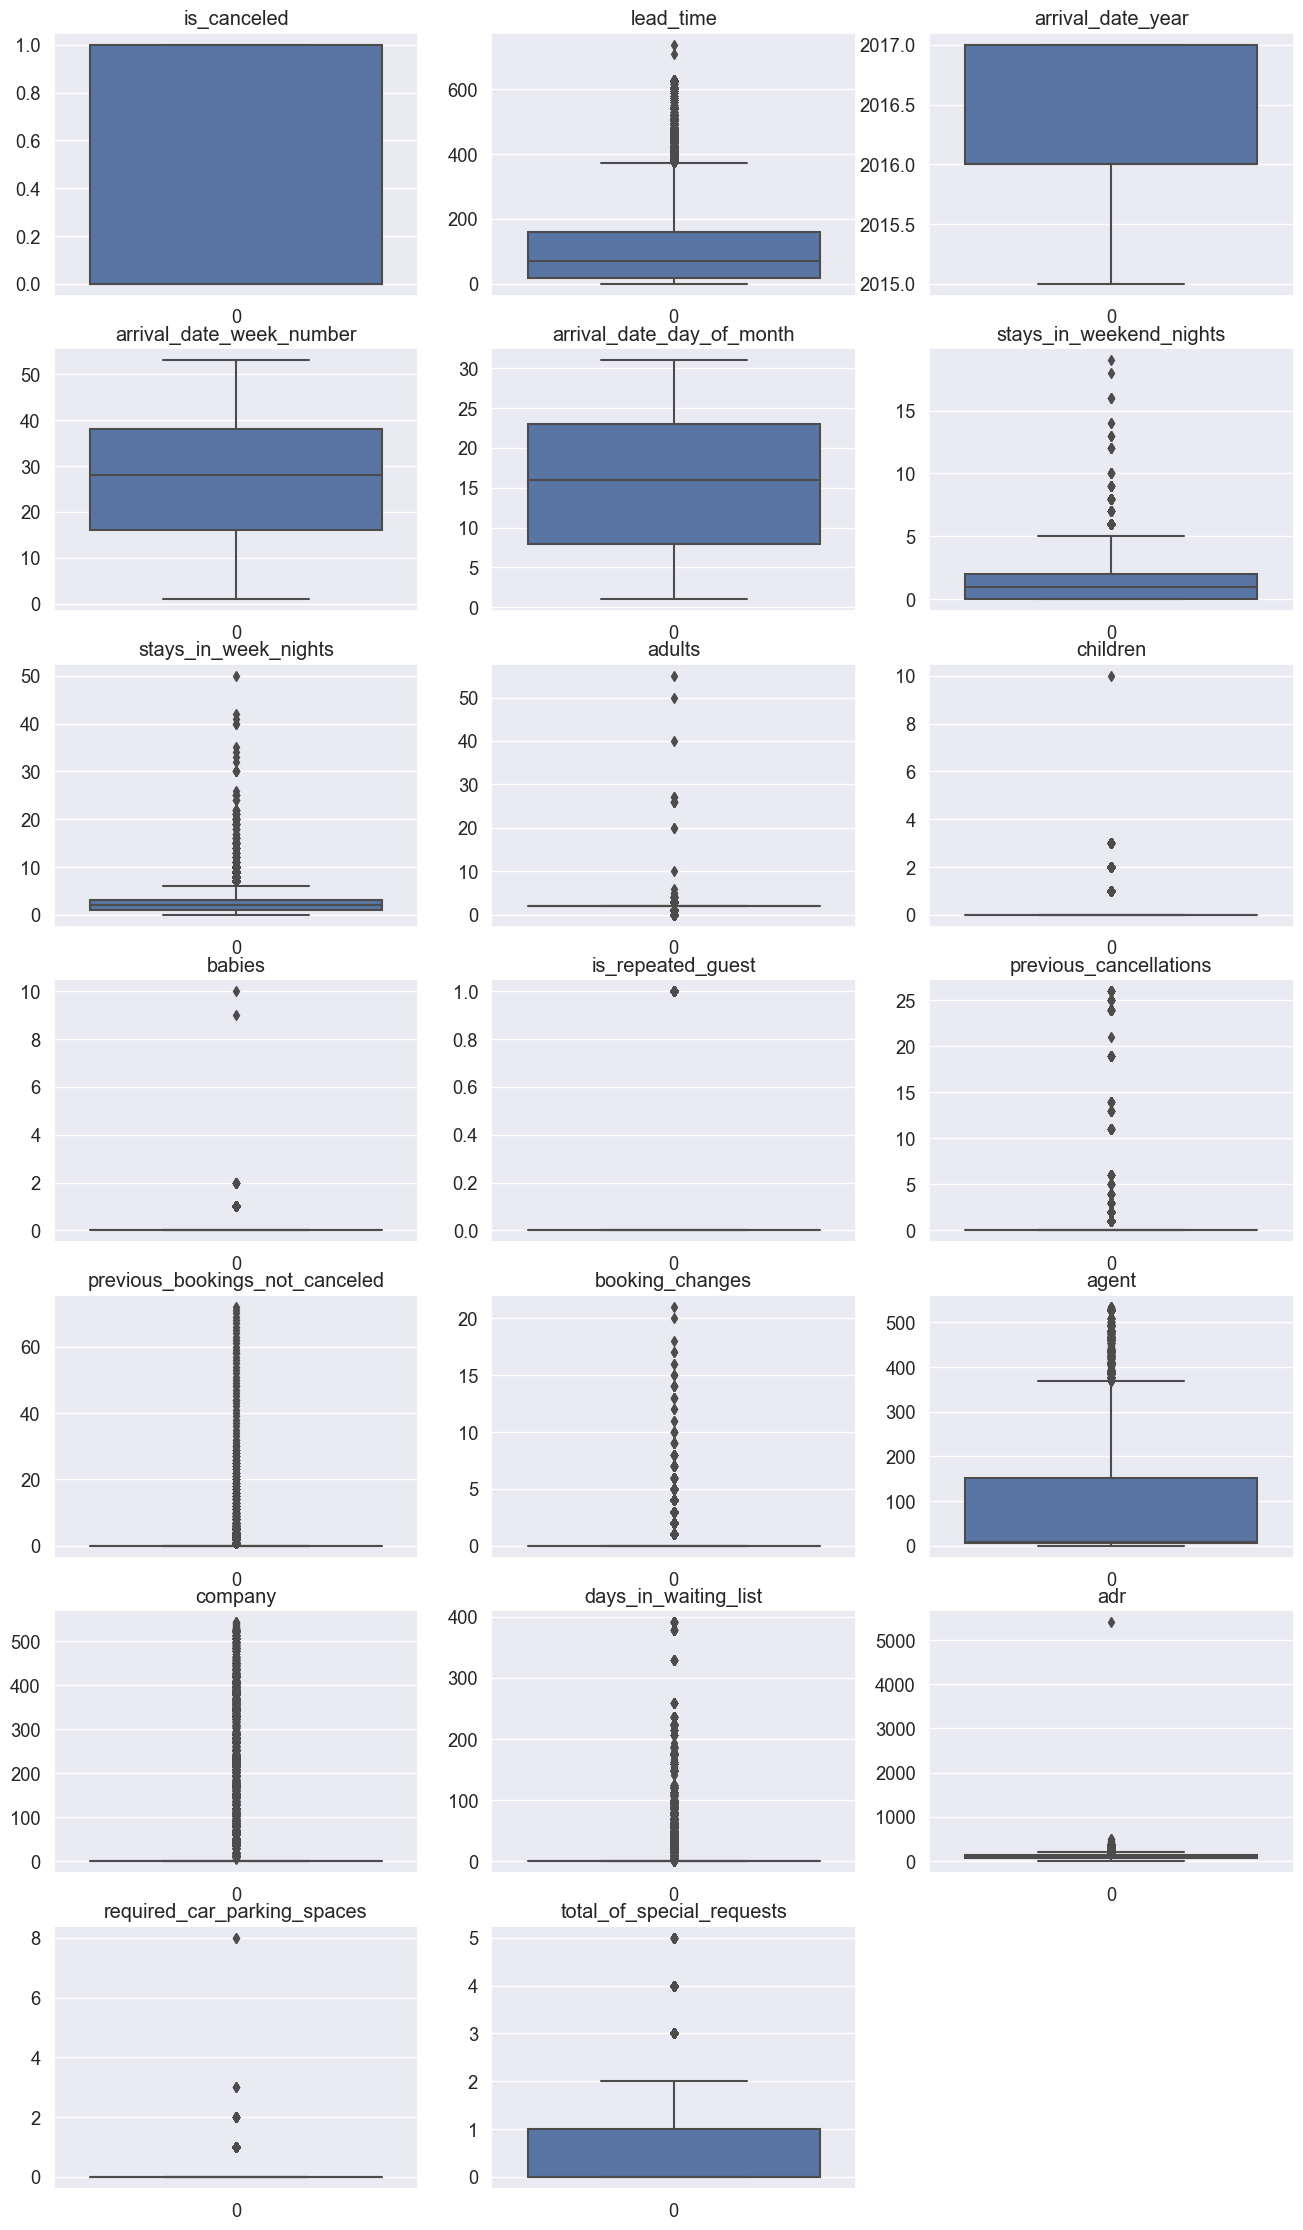

In [24]:
#Investigating outliers with a boxplot
n = 1

sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for numerical_col in dataset_numerical_features:
    plt.subplot(7,3,n)
    sns.boxplot(dataset[numerical_col]).set(xlabel =None)
    sns.color_palette("husl", 9)
    plt.title(numerical_col)
    n = n + 1


In [25]:
dataset_numerical_features.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


There are outliers in the dataset. <b>children, babies, adr, </b>and<b> required_car_parking_spaces, </b> with the following values <b>10, 10, 5400,</b> and <b>8</b> respectively, are mostly obvious. With values extreme from the rest of the data points.


Further invsetigation outliers in the cell below, and how data is concentrated or dispersed for both hotels using a stripplot.

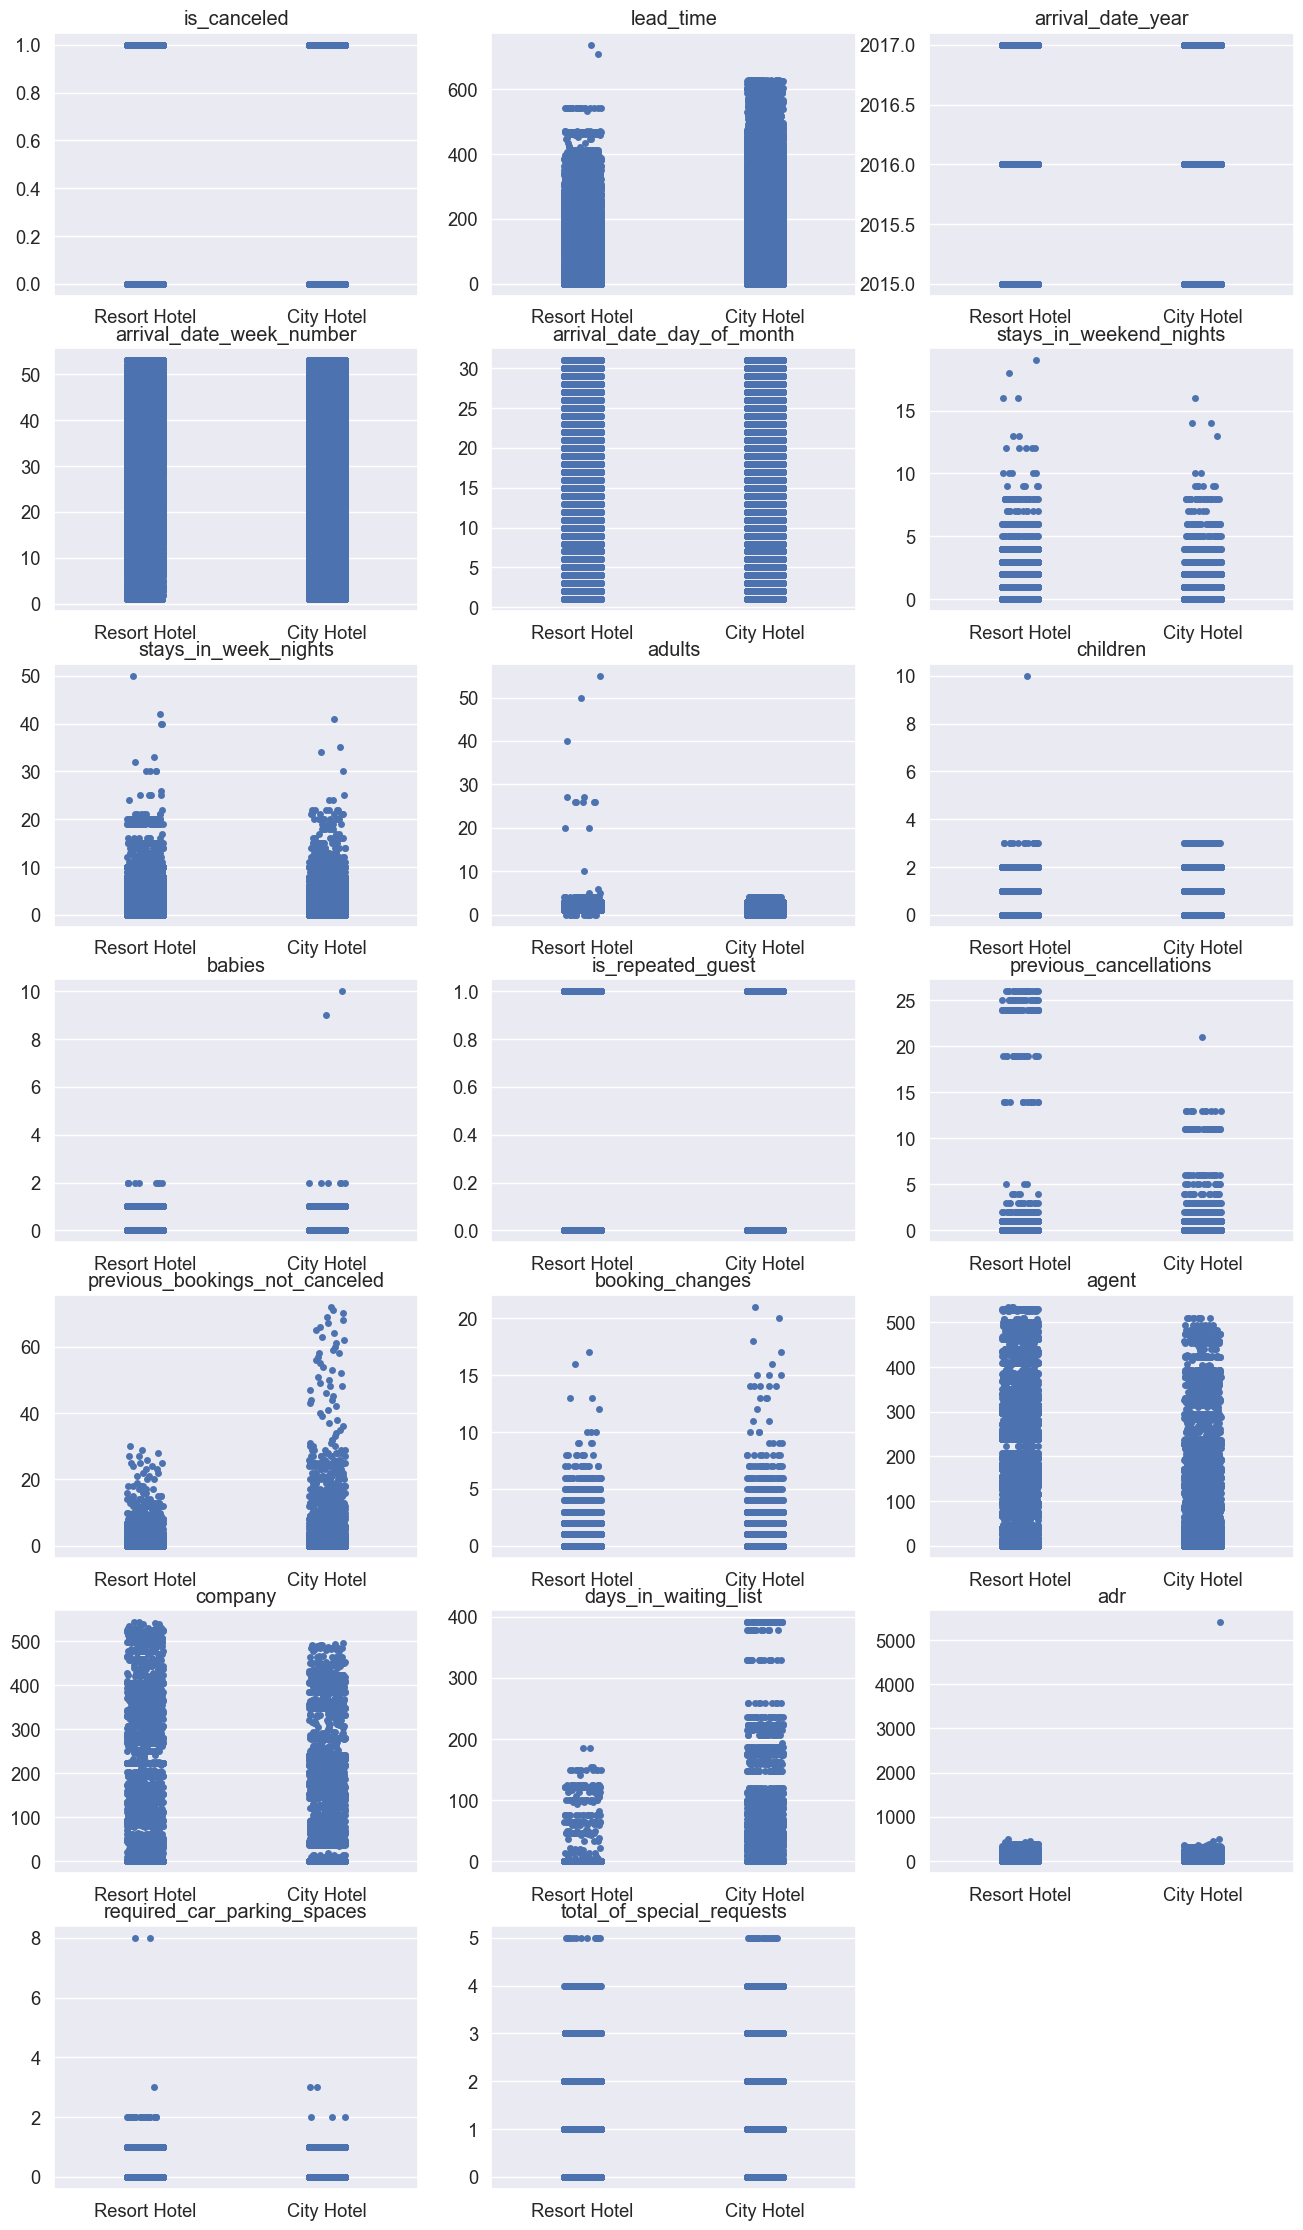

In [26]:
n = 1

sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for numerical_col in dataset_numerical_features:
    plt.subplot(7,3,n)
    sns.stripplot(x=dataset['hotel'], y=dataset[numerical_col]).set(xlabel =None, ylabel =None)
    sns.color_palette("husl", 9)
    plt.title(numerical_col)
    n = n + 1


children, babies, adr, </b>and required_car_parking_spaces<b> all have ouliers

In [27]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64'])

print(f"Finding Outliers For All Numeric Columns Using IQR method\n".upper())


for  numeric_features in numerical_columns:
    q1 = dataset[numeric_features].quantile(0.25)
    q3 = dataset[numeric_features].quantile(0.75)
    iqr = q3 - q1
    print(f"\n{numeric_features}: \n q1 {q1}\n")
    print(f"\n q3 {q3}\n")
    print(f"\n iqr {iqr}\n")
    print(f"\n lower_limit = {q1-(1.5*iqr)}, upper_limit = {q3+(1.5*iqr)}")
    print(f"\n ")
    print('-' * 40)

FINDING OUTLIERS FOR ALL NUMERIC COLUMNS USING IQR METHOD


is_canceled: 
 q1 0.0


 q3 1.0


 iqr 1.0


 lower_limit = -1.5, upper_limit = 2.5

 
----------------------------------------

lead_time: 
 q1 18.0


 q3 160.0


 iqr 142.0


 lower_limit = -195.0, upper_limit = 373.0

 
----------------------------------------

arrival_date_year: 
 q1 2016.0


 q3 2017.0


 iqr 1.0


 lower_limit = 2014.5, upper_limit = 2018.5

 
----------------------------------------

arrival_date_week_number: 
 q1 16.0


 q3 38.0


 iqr 22.0


 lower_limit = -17.0, upper_limit = 71.0

 
----------------------------------------

arrival_date_day_of_month: 
 q1 8.0


 q3 23.0


 iqr 15.0


 lower_limit = -14.5, upper_limit = 45.5

 
----------------------------------------

stays_in_weekend_nights: 
 q1 0.0


 q3 2.0


 iqr 2.0


 lower_limit = -3.0, upper_limit = 5.0

 
----------------------------------------

stays_in_week_nights: 
 q1 1.0


 q3 3.0


 iqr 2.0


 lower_limit = -2.0, upper_limit = 6.0



In [28]:
upper_limit = numerical_columns.quantile(0.99)
upper_limit

is_canceled                          1.0
lead_time                          444.0
arrival_date_year                 2017.0
arrival_date_week_number            53.0
arrival_date_day_of_month           31.0
stays_in_weekend_nights              4.0
stays_in_week_nights                10.0
adults                               3.0
children                             2.0
babies                               0.0
is_repeated_guest                    1.0
previous_cancellations               1.0
previous_bookings_not_canceled       3.0
booking_changes                      3.0
agent                              378.0
company                            331.0
days_in_waiting_list                75.0
adr                                252.0
required_car_parking_spaces          1.0
total_of_special_requests            3.0
Name: 0.99, dtype: float64

In [29]:
lower_limit = numerical_columns.quantile(0.01)
lower_limit

is_canceled                          0.0
lead_time                            0.0
arrival_date_year                 2015.0
arrival_date_week_number             2.0
arrival_date_day_of_month            1.0
stays_in_weekend_nights              0.0
stays_in_week_nights                 0.0
adults                               1.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
agent                                0.0
company                              0.0
days_in_waiting_list                 0.0
adr                                  0.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
Name: 0.01, dtype: float64

### Capping the outliers

In [30]:
#caping the outliers in lead_time, children, adr,

dataset.loc[dataset.lead_time > 373.0,'lead_time']=373.0
dataset.loc[dataset.adr > 211.065,'adr']=211.065
dataset.loc[dataset.children > 1.0,'children']=1.0
dataset.loc[dataset.stays_in_weekend_nights > 5.0,'children']=5.0
dataset.loc[dataset.stays_in_week_nights > 6.0,'children']=6.0
dataset.loc[dataset.agent > 369.5,'agent']=369.5

In [31]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,102.229157,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.238110,0.007949,0.031912,0.087118,0.137097,0.221124,74.035154,10.775157,2.321149,100.659305,0.062518,0.571363
std,0.482918,101.158934,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,1.012045,0.097436,0.175767,0.844336,1.497437,0.652306,104.540110,53.943884,17.594721,44.688946,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,373.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,6.000000,10.000000,1.000000,26.000000,72.000000,21.000000,369.500000,543.000000,391.000000,211.065000,8.000000,5.000000


### Checking for Duplicated Data 

In [32]:
# Checking and Suming of duplicated data in dataframe

#dataset.duplicated().sum()

In [33]:
# Dropping duplicated rows

#dataset.drop_duplicates(inplace = True)

In [34]:
dataset.shape

(119390, 32)

### Checking for Null Values 

In [35]:
dataset.isna().any().any()

True

In [36]:
dataset.isna().any().sum()

1

In [37]:
#Number of missing values in each column

dataset.isnull().sum().sort_values(ascending = False)

children                          4
hotel                             0
previous_cancellations            0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
is_repeated_guest                 0
is_canceled                       0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [38]:
#Removing the specific rows affected by NULL values in children column
dataset.dropna(subset = ['children'], inplace = True)

In [39]:
dataset.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [40]:
#Checking for missing values again
dataset.isna().any().any()

#dataset.isna().any().sum()

#dataset.isna().any()

#dataset.isna()

False

In [41]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data Preparation 

In [42]:
# Converting reservation_status_date to datetime datatype

dataset['reservation_status_date'] = pd.to_datetime(dataset['reservation_status_date'])

In [43]:
# Creating month column and converting reservation_status_date datatype to month
dataset['month'] = dataset['reservation_status_date'].dt.month

In [44]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [45]:
# Dataset with confirmed bookings only

confirmed_bookings = dataset[dataset['is_canceled'] == 0]

In [46]:
# Dataset with canceled bookings only

canceled_bookings = dataset[dataset['is_canceled'] == 1]

## EDA and Visualization

### Question 1 

#### Combined Reservations Count and Percentage Canceled vs not Canceled for Resort and City Hotels 

In [47]:
dataset.groupby('is_canceled').count()['hotel']

is_canceled
0    75166
1    44220
Name: hotel, dtype: int64

In [48]:
# Percentage Reservation Not Canceled vs Cancedled for both hotels

#dataset.groupby('is_canceled').count()['hotel']/len(dataset)

dataset['is_canceled'].value_counts(normalize=True)

0    0.629605
1    0.370395
Name: is_canceled, dtype: float64

In [2]:
# Plotting bar graph of Reservation Count and Percentage for Not Canceled vs Cancedled 
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
plt.title('Reservations Not Canceled Vs Canceled Count')
plt.bar(['Not Canceled', 'Canceled'], dataset['is_canceled'].value_counts(), edgecolor = 'red', width=0.5)

plt.subplot(1, 2, 2)
(dataset['is_canceled']).value_counts().plot.pie(colors=['b', 'grey'], labels=['Not Canceled', 'Canceled'], 
title = '% Not Canceled vs Canceled Reservation', autopct='%1.1f%%')
plt.subplots_adjust(right=1.9)
plt.show()

### Question 2 
#### Reservation Count and Percentage Not Canceled vs Cancedled for each hotel 

In [50]:
# Question 2 Reservation Count Not Canceled vs Cancedled for resort hotels 

resort_hotel = dataset[dataset['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts()

0    28938
1    11122
Name: is_canceled, dtype: int64

In [51]:
# % rservations not cancelled vs cancelled Resort Hotel 
perc_resort_hotel = resort_hotel['is_canceled'].value_counts(normalize=True)
perc_resort_hotel

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [52]:
# Question 2 Reservation Count Not Canceled vs Cancedled for city hotels 

city_hotel = dataset[dataset['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts()

0    46228
1    33098
Name: is_canceled, dtype: int64

In [53]:
# % rservations not cancelled vs cancelled City Hotel 
perc_city_hotel = city_hotel['is_canceled'].value_counts(normalize=True)
perc_city_hotel

0    0.58276
1    0.41724
Name: is_canceled, dtype: float64

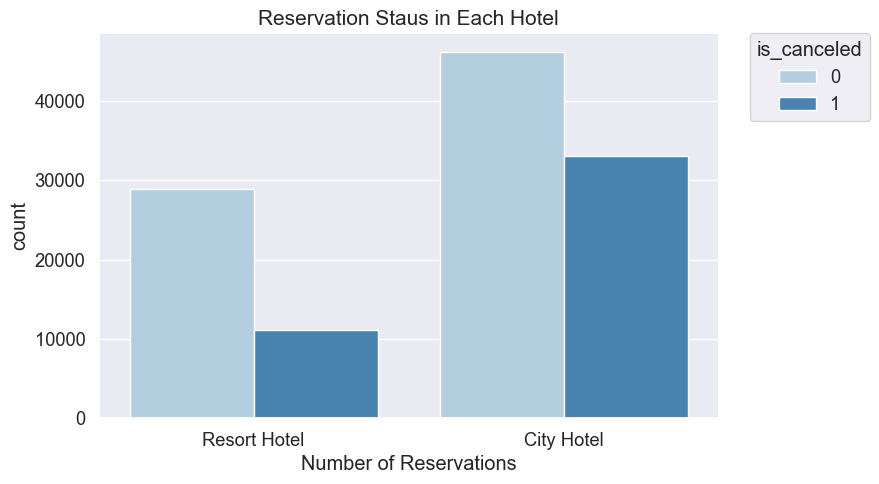

In [54]:
#Plotting rservations cancelled vs not cancelled count for different hotels 
plt.figure(figsize = (8,5))
ax = sns.countplot(x='hotel', hue='is_canceled', data = dataset, palette = 'Blues')
legend_labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='is_canceled', borderaxespad=0)
plt.title('Reservation Staus in Each Hotel',  size=15)
plt.xlabel('Hotel')
plt.xlabel('Number of Reservations')
plt.show()

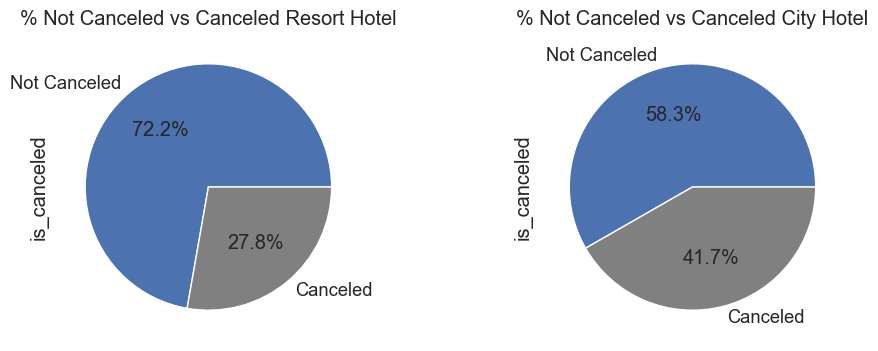

In [55]:
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
(perc_resort_hotel).plot.pie(colors=['b', 'grey'], labels=['Not Canceled', 'Canceled'], 
title = '% Not Canceled vs Canceled Resort Hotel', autopct='%1.1f%%')

plt.subplot(1, 2, 2)
(perc_city_hotel).plot.pie(colors=['b', 'grey'], labels=['Not Canceled', 'Canceled'], 
title = '% Not Canceled vs Canceled City Hotel', autopct='%1.1f%%')
plt.subplots_adjust(right=1.9)
plt.show()

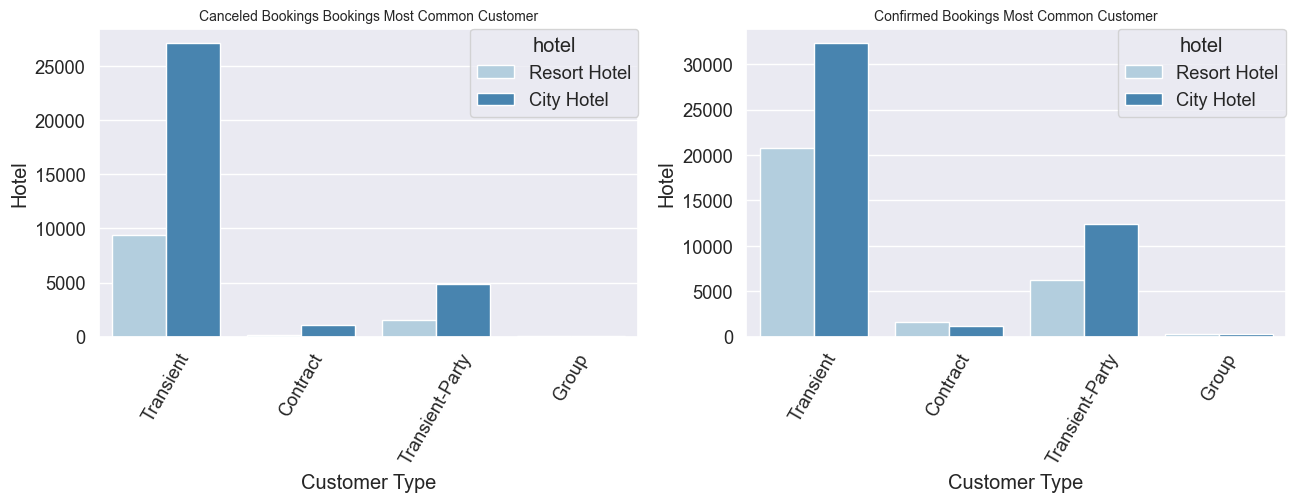

In [56]:
# Types of customers most common in each hotel for for canceled and not canceled bookings.
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='customer_type', hue='hotel', data = canceled_bookings, palette = 'Blues')
legend_labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right', title='hotel', borderaxespad=0)
plt.title('Canceled Bookings Bookings Most Common Customer',  size=10)
plt.ylabel('Hotel')
plt.xlabel('Customer Type')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
ax = sns.countplot(x='customer_type', hue='hotel', data = confirmed_bookings, palette = 'Blues')
legend_labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right', title='hotel', borderaxespad=0)
plt.title('Confirmed Bookings Most Common Customer',  size=10)
plt.ylabel('Hotel')
plt.xlabel('Customer Type')
plt.xticks(rotation=60)
plt.subplots_adjust(right=2.5)
plt.show()

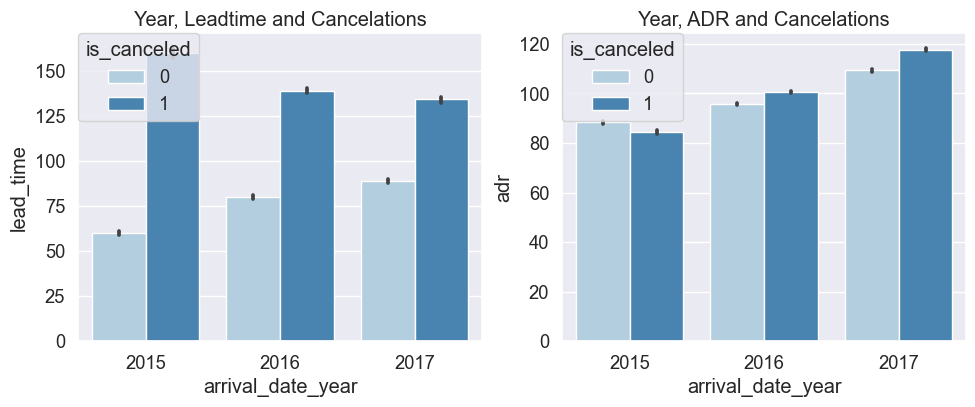

In [57]:
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
ax = sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data= dataset, palette='Blues')
ax.legend(loc='upper left', title='is_canceled', borderaxespad=0)
plt.title('Year, Leadtime and Cancelations')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='arrival_date_year', y='adr', hue='is_canceled', data= dataset, palette='Blues')
ax.legend(loc='upper left', title='is_canceled', borderaxespad=0)
plt.title('Year, ADR and Cancelations')
plt.subplots_adjust(right=1.9)
plt.show()

#### Analyzing Effect of adr (average daily rate) on bookings and cancelations

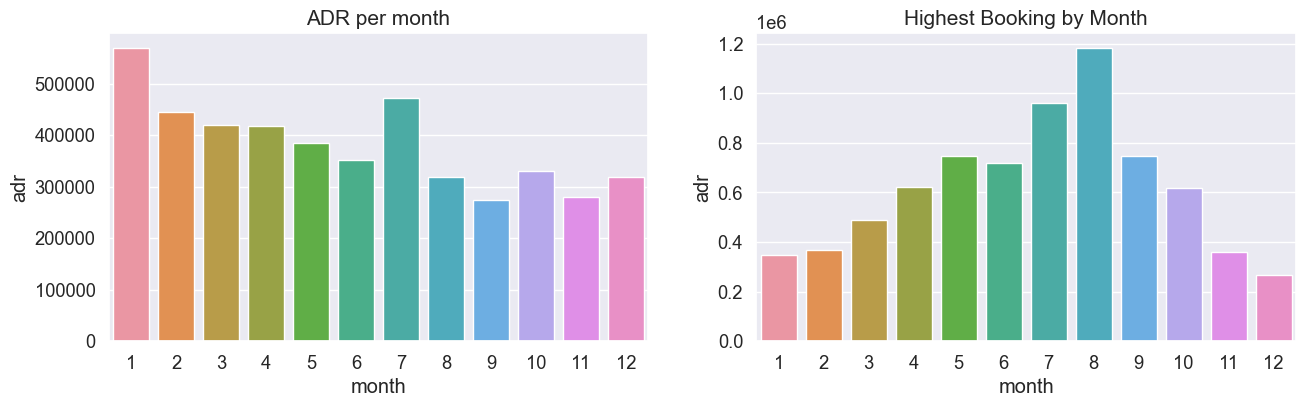

In [58]:
#Plotting adr (Average Daily Rate) for the period   

plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
plt.title('ADR per month', fontsize=15)
sns.barplot(x='month', y='adr', data = dataset[dataset['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())

#Plotting Month with the Highest Booking  
plt.subplot(1, 2, 2)
plt.title('Highest Booking by Month', fontsize=15)
sns.barplot(x='month', y='adr', data = dataset[dataset['is_canceled']==0].groupby('month')[['adr']].sum().reset_index())
plt.subplots_adjust(right=2.5)
plt.show()

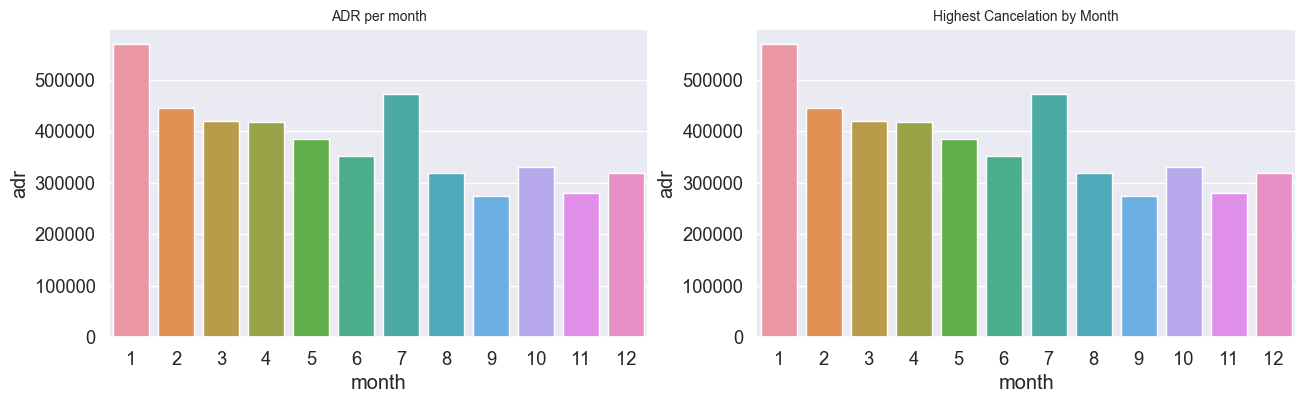

In [59]:
#Plotting adr (Average Daily Rate) for the period   

plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
plt.title('ADR per month', fontsize=10)
sns.barplot(x='month', y='adr', data = dataset[dataset['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())

#Plotting Month with the Highest Cancelation  
plt.subplot(1, 2, 2)
plt.title('Highest Cancelation by Month', fontsize=10)
sns.barplot(x='month', y='adr', data = dataset[dataset['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.subplots_adjust(right=2.5)
plt.show()

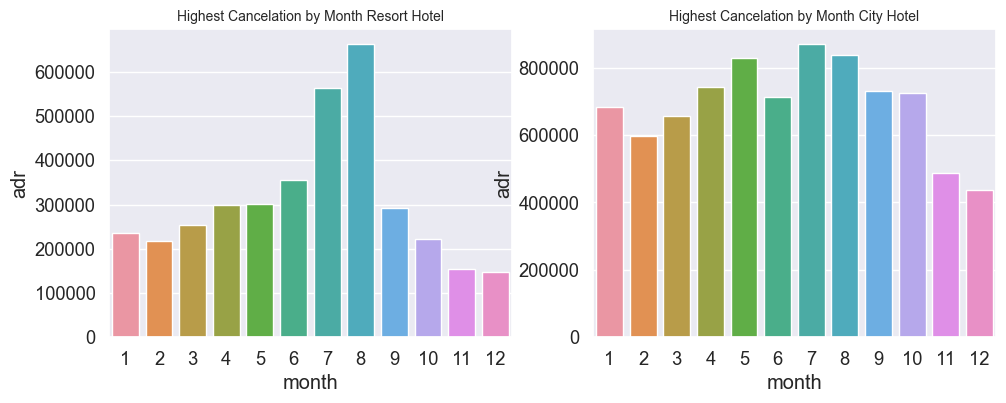

In [60]:
# Plotting effect of changes in adr for each hotel

plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
plt.title('Highest Cancelation by Month Resort Hotel', fontsize=10)
sns.barplot(x='month', y='adr', data = resort_hotel.groupby('month')[['adr']].sum().reset_index())

plt.subplot(1, 2, 2)
plt.title('Highest Cancelation by Month City Hotel', fontsize=10)
sns.barplot(x='month', y='adr', data = city_hotel.groupby('month')[['adr']].sum().reset_index())
plt.subplots_adjust(right=1.9)
plt.show() 

### Question 3
#### Top 5 countries with the highest booking and cancelation

In [61]:
# Question 3 
#Top 5 countries with the highest booking 

top_5_country_booking = dataset[dataset['is_canceled']==0]
top_5_booking = top_5_country_booking['country'].value_counts()[:5]
top_5_booking

PRT    21492
GBR     9676
FRA     8481
ESP     6391
DEU     6069
Name: country, dtype: int64

In [62]:
#Top 5 countries with the highest cancelation
top_5_country_cancelation = dataset[dataset['is_canceled']==1]
top_5_cancel = top_5_country_cancelation['country'].value_counts()[:5]
top_5_cancel

PRT    27582
GBR     2453
ESP     2177
FRA     1934
ITA     1333
Name: country, dtype: int64

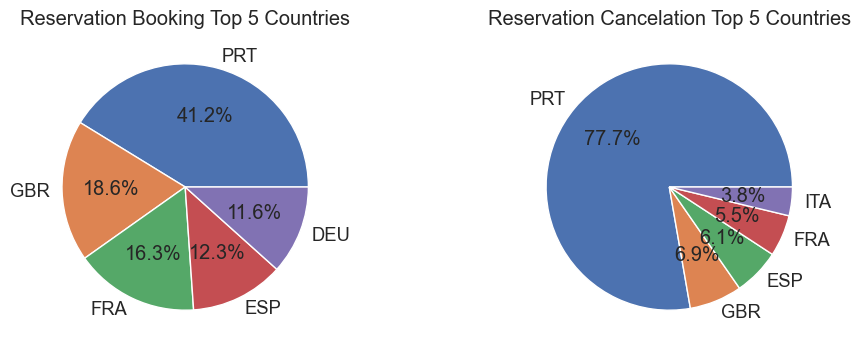

In [63]:
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
plt.title('Reservation Booking Top 5 Countries')
plt.pie(top_5_booking, autopct='%1.1f%%', labels = top_5_booking.index)

plt.subplot(1, 2, 2)
plt.title('Reservation Cancelation Top 5 Countries')
plt.pie(top_5_cancel, autopct='%1.1f%%', labels = top_5_cancel.index)
plt.subplots_adjust(right=1.9)
plt.show()

### Question 4, 5 and 6 
#### Deposit Types for All Reservations 
#### Deposit types for All Reservations based on Customer Type
#### Deposit types for Canceled Reservation, Confirmed Bookings by Customer Type  

In [64]:
# Deposit Types 
#Analyzing all Deposit Types Count
deposit_type_count = dataset['deposit_type'].value_counts()
deposit_type_count

No Deposit    104637
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [65]:
#All Deposit Types by Percentage 
deposit_type_per = dataset['deposit_type'].value_counts(normalize=True)
deposit_type_per

No Deposit    0.876460
Non Refund    0.122184
Refundable    0.001357
Name: deposit_type, dtype: float64

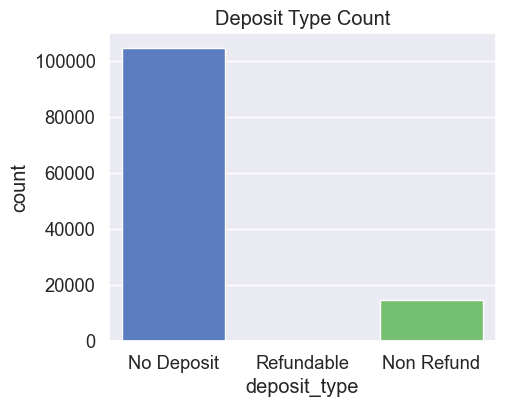

In [66]:
# Plotting the Most Frequent Deposit Type
plt.figure(figsize = (5, 4))
sns.countplot(x='deposit_type', data=dataset, palette='muted')
plt.title('Deposit Type Count')
plt.show()

In [67]:
depo_type_by_customer_per = dataset.groupby(['deposit_type'])[['customer_type']]
depo_type_by_customer_per.value_counts()

deposit_type  customer_type  
No Deposit    Transient          76684
              Transient-Party    23854
              Contract            3530
              Group                569
Non Refund    Transient          12909
              Transient-Party     1134
              Contract             544
Refundable    Transient-Party      132
              Transient             20
              Group                  8
              Contract               2
dtype: int64

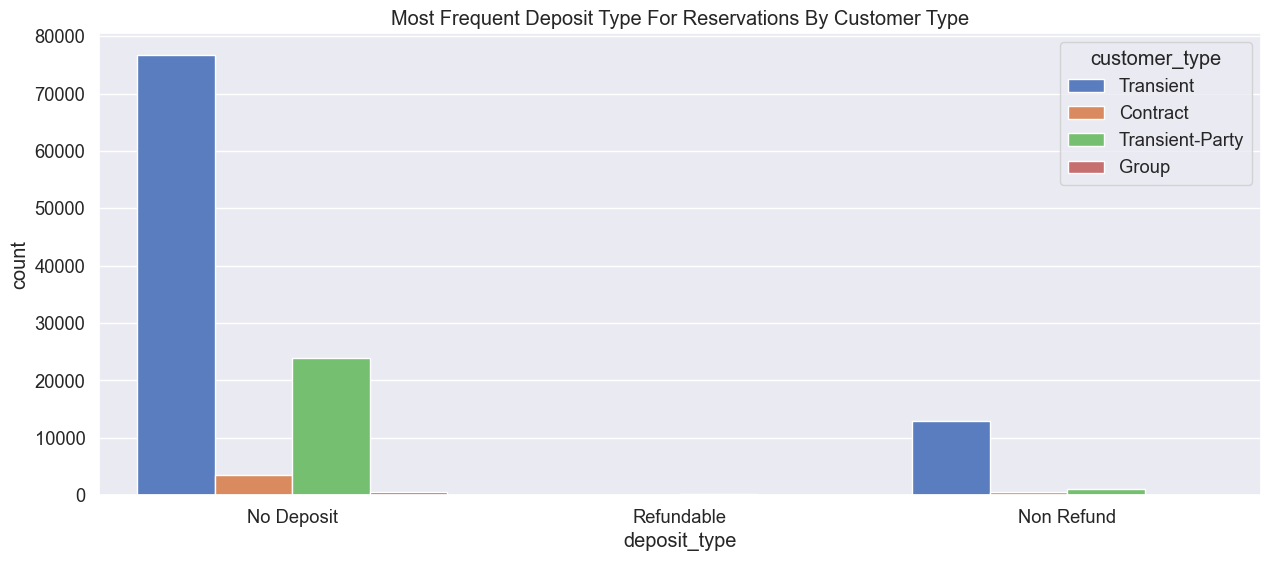

In [68]:
#Deposit Type for reservations/bookings based on customer type

plt.figure(figsize = (15, 6))
sns.countplot(x='deposit_type',hue='customer_type', data=dataset, palette='muted')
plt.title('Most Frequent Deposit Type For Reservations By Customer Type')
plt.show()

In [69]:
depo_type_canceled_reserv = canceled_bookings.groupby(['deposit_type'])['customer_type']
depo_type_canceled_reserv.value_counts()

deposit_type  customer_type  
No Deposit    Transient          23585
              Transient-Party     5330
              Contract             716
              Group                 59
Non Refund    Transient          12909
              Transient-Party     1041
              Contract             544
Refundable    Transient             20
              Transient-Party       14
              Contract               2
Name: customer_type, dtype: int64

In [70]:
depo_type_confirmed_booking = confirmed_bookings.groupby(['deposit_type'])['customer_type']
depo_type_confirmed_booking.value_counts()

deposit_type  customer_type  
No Deposit    Transient          53099
              Transient-Party    18524
              Contract            2814
              Group                510
Non Refund    Transient-Party       93
Refundable    Transient-Party      118
              Group                  8
Name: customer_type, dtype: int64

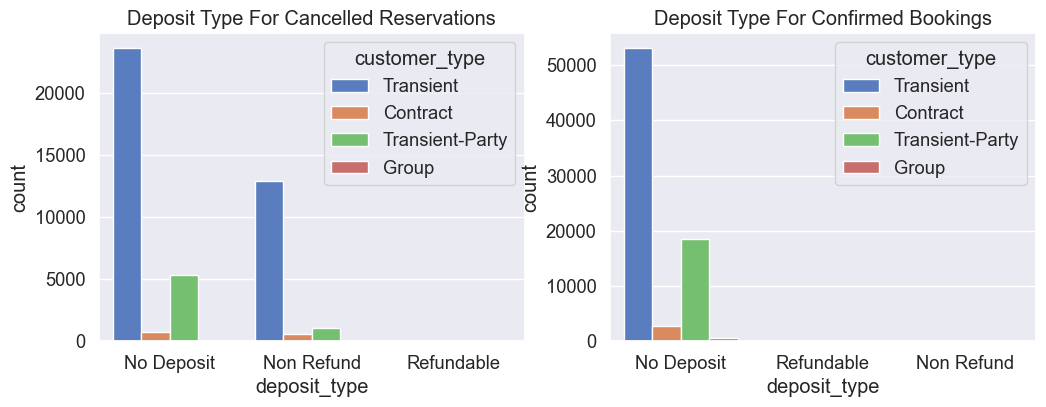

In [71]:
#Plotting Deposit Type for both Canceled Reservations and Confirmed Bookings to compare 
#canceled_bookings = dataset[dataset['is_canceled'] == 1]

#confirmed_bookings = dataset[dataset['is_canceled'] == 0]

plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='deposit_type', hue = 'customer_type', data=canceled_bookings, palette='muted')
plt.title('Deposit Type For Cancelled Reservations')

plt.subplot(1, 2, 2)
sns.countplot(x='deposit_type', hue = 'customer_type', data=confirmed_bookings, palette='muted')
plt.title('Deposit Type For Confirmed Bookings')
plt.subplots_adjust(right=2)
plt.show()


### Question 7 
#### Reservations by Repeated Visitors 

In [72]:
data = confirmed_bookings['is_repeated_guest'].value_counts()
data

0    71908
1     3258
Name: is_repeated_guest, dtype: int64

In [73]:
data = confirmed_bookings['is_repeated_guest']
data.value_counts()

0    71908
1     3258
Name: is_repeated_guest, dtype: int64

In [74]:
data = confirmed_bookings['is_repeated_guest']
data.value_counts(normalize=True)

0    0.956656
1    0.043344
Name: is_repeated_guest, dtype: float64

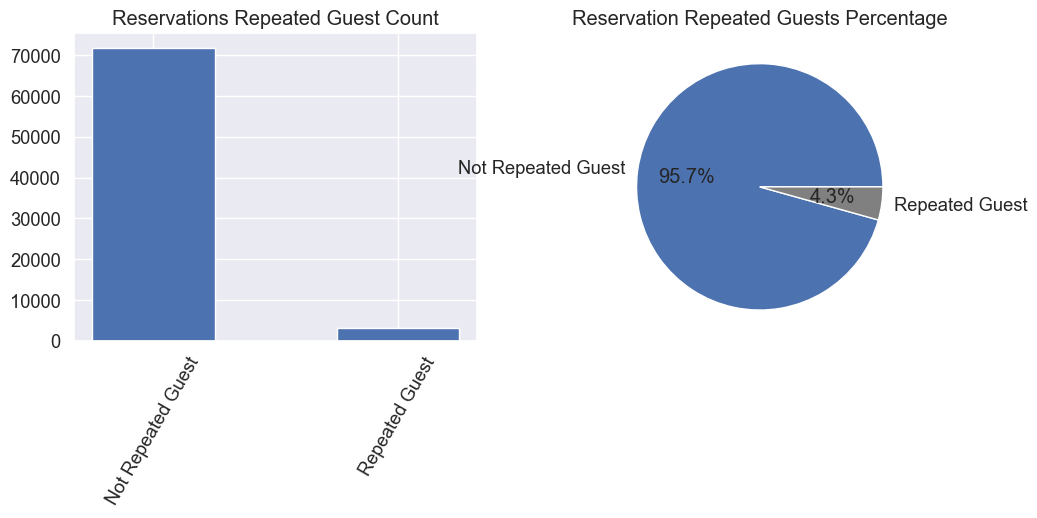

In [75]:
# Analyzing Repeated Guest Count 
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
plt.title('Reservations Repeated Guest Count')
plt.bar(['Not Repeated Guest', 'Repeated Guest'], confirmed_bookings['is_repeated_guest'].value_counts(), width=0.5)
plt.xticks(rotation=60)

is_repeated = confirmed_bookings['is_repeated_guest'].value_counts()
plt.subplot(1, 2, 2)
plt.title('Reservation Repeated Guests Percentage')
plt.pie(is_repeated, colors=['b', 'grey'], autopct='%1.1f%%', labels = ['Not Repeated Guest', 'Repeated Guest'])
plt.subplots_adjust(right=1.9)
plt.show()


### Question 8
#### Most preffered meal plan by visitors 

In [76]:
#Analysing Most preferred meal plan?
meal_prefered = dataset['meal'].value_counts()
meal_prefered

BB    92306
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [77]:
meal_prefered = dataset['meal']
meal_prefered.value_counts(normalize=True)

BB    0.773173
HB    0.121145
SC    0.098998
FB    0.006684
Name: meal, dtype: float64

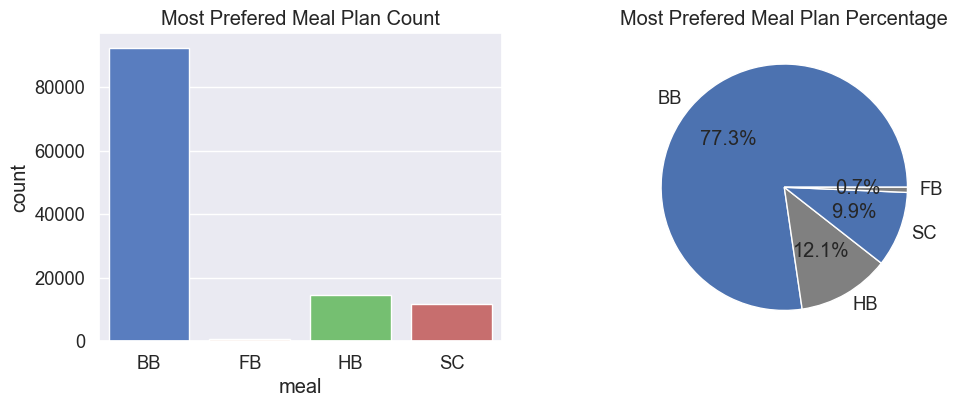

In [78]:
# Plotting Meal Prefered Count and Percentage 
plt.figure(figsize = (5, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='meal', data=dataset, palette='muted')
plt.title('Most Prefered Meal Plan Count')
#plt.xticks(rotation=60)

meal_prefered = dataset['meal'].value_counts()
plt.subplot(1, 2, 2)
plt.title('Most Prefered Meal Plan Percentage')
plt.pie(meal_prefered, colors=['b', 'grey'], autopct='%1.1f%%', labels = meal_prefered.index)
plt.subplots_adjust(right=1.9)
plt.show()

### Question 9
#### Most preffered hotel by Visitors


In [79]:
prefered_hotel = dataset.groupby(['customer_type'])[['hotel']]
prefered_hotel.value_counts()

customer_type    hotel       
Contract         City Hotel       2300
                 Resort Hotel     1776
Group            City Hotel        293
                 Resort Hotel      284
Transient        City Hotel      59404
                 Resort Hotel    30209
Transient-Party  City Hotel      17329
                 Resort Hotel     7791
dtype: int64

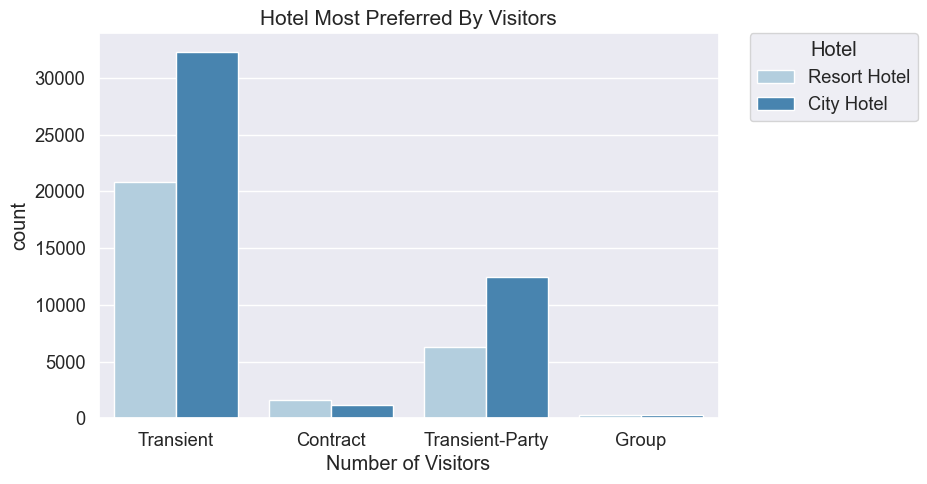

In [80]:
#Plotting Hotel Prefered by Guests 
plt.figure(figsize = (8,5))
ax = sns.countplot(confirmed_bookings, x='customer_type', hue='hotel', palette = 'Blues')
legend_labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='Hotel', borderaxespad=0)
plt.title('Hotel Most Preferred By Visitors',  size=15)
#plt.xlabel('Hotel')
plt.xlabel('Number of Visitors')
plt.show()

### Question 10
#### Booking based on Market segment and Distribution Channel for CONFIRMED reservation 

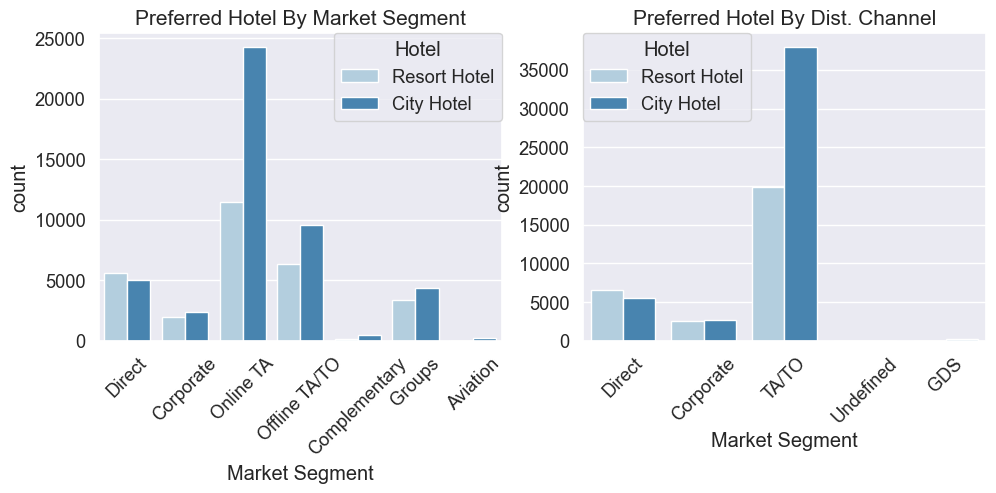

In [81]:
#Plotting Hotel Prefered by Guests by Market Segment and Distribution Channel

plt.figure(figsize = (5,4))
plt.subplot(1,2,1)
ax = sns.countplot(confirmed_bookings, x='market_segment', hue='hotel', palette = 'Blues')
legend_labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right', title='Hotel', borderaxespad=0)
plt.title('Preferred Hotel By Market Segment',  size=15)
#plt.xlabel('Hotel')
plt.xticks(rotation=45)
plt.xlabel('Market Segment')

plt.subplot(1,2,2)
ax = sns.countplot(confirmed_bookings, x='distribution_channel', hue='hotel', palette = 'Blues')
legend_labels = ax.get_legend_handles_labels()
ax.legend(loc='upper left', title='Hotel', borderaxespad=0)
plt.title('Preferred Hotel By Dist. Channel',  size=15)
#plt.xlabel('Hotel')
plt.xticks(rotation=45)
plt.xlabel('Market Segment')
plt.subplots_adjust(right=1.9)
plt.show()

### Question 11
#### Leading Market segment and Distribution Channel for CONFIRMED reservation 

In [82]:
confirmed_bookings['market_segment'].value_counts()

Online TA        35738
Offline TA/TO    15908
Direct           10672
Groups            7714
Corporate         4303
Complementary      646
Aviation           185
Name: market_segment, dtype: int64

In [83]:
confirmed_bookings['distribution_channel'].value_counts()

TA/TO        57718
Direct       12088
Corporate     5203
GDS            156
Undefined        1
Name: distribution_channel, dtype: int64

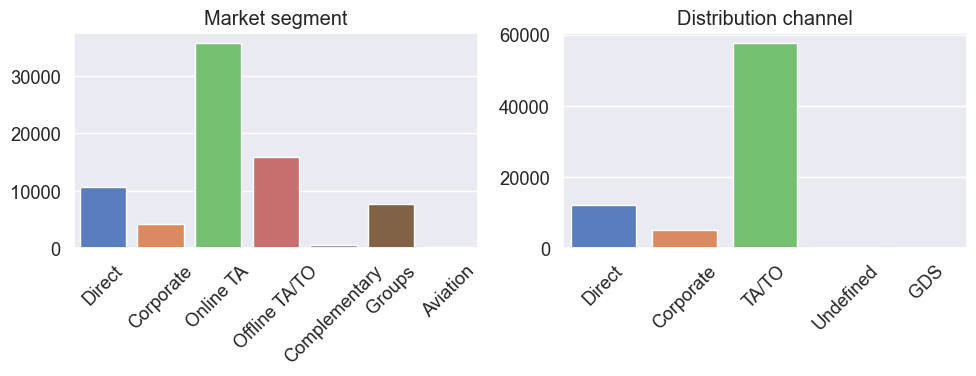

In [84]:
#Plotting Leading Market segment and Distribution Channel for CONFIRMED reservation 

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
sns.countplot(confirmed_bookings, x = 'market_segment', palette='muted').set(xlabel = None, ylabel = None)
plt.title('Market segment')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(confirmed_bookings, x = 'distribution_channel', palette='muted').set(xlabel = None, ylabel = None)
plt.title('Distribution channel')
plt.xticks(rotation=45)

plt.subplots_adjust(right=1.9)
plt.tight_layout()

Contact Details:

- WhatsApp : +2347065093865
- Email : davoazorji1@gmail.com